In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dropout,Dense,BatchNormalization

In [5]:
model=keras.models.load_model('models/ref/ref_cnn.h5')

In [6]:
import os

x_test=[]

path_test_low='../dataSets/test images/'

print('\nLoding Test dataset :')

i=0;
for img in os.listdir(path_test_low):
    img_low_path=os.path.join(path_test_low, img)
    
    img_low=load_img(img_low_path, target_size=(128, 128))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/0.1)+' %',end='\r')
    
    x_test.append(img_low)

x_test=np.array(x_test, dtype="float32")


Loding Test dataset :


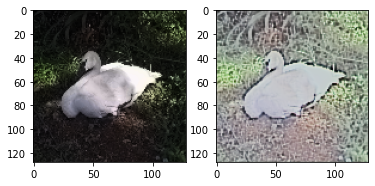

In [10]:
fig=plt.figure();

def check_result(n):
    fig.add_subplot(1,2,1).imshow(x_test[n])
    fig.add_subplot(1,2,2).imshow(model.predict(x_test)[n])

check_result(9);